# Introduction

The Anuran Calls Dataset is multilabel dataset with 3 columns of labels. It is used in the classification/recognition of Anuran species through auditory characteristics (Calls). The dataset was created segmenting 60 audio records belonging to 4 different families, 8 genus, and 10 species. Each audio corresponds to one specimen (an individual frog), the record ID is also included as an extra column.

### Dataset Overview
The dataset contains 22 features and 3 classification labels. MFCCs stand for Mel-Frequency Cepstral Coefficients. They are a set of features that represent the timbral information of a signal and are used to model voice characteristics.

The task is to apply advanced clustering techniques  to group the frogs into clusters based on MFCCs features and explore clustering performance using additional evaluation methods.

### Clustering Approach:
We will perform K-Means Clustering. To find the optimal number of clusters, we will use 2 methods:
- Elbow Method
- Silhouette Method

Then we will find Davies-Bouldin and Calinski-Harabasz Index for different clusters and validate our choice of K.

*More details on the terminlogies are provided when they are used in the notebook*

In [163]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading the dataset. Since there are only a few thousand features, there is no need to contract this dataset and the models can be directly applied after doing appropriate train-test splits on the entire dataset

In [164]:
df = pd.read_csv('Frogs_MFCCs.csv')
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


### Constants

Sets some constants that may be needed in future

In [165]:
target_col_names = ['Family', 'Genus', 'Species']

# Exploratory Data Analysis and Preprocessing

### Quick Feature Analysis

#### Data types:

The class lables are object types, so we will need to vectorize them in some way in future to use them


In [166]:
df.dtypes

MFCCs_ 1    float64
MFCCs_ 2    float64
MFCCs_ 3    float64
MFCCs_ 4    float64
MFCCs_ 5    float64
MFCCs_ 6    float64
MFCCs_ 7    float64
MFCCs_ 8    float64
MFCCs_ 9    float64
MFCCs_10    float64
MFCCs_11    float64
MFCCs_12    float64
MFCCs_13    float64
MFCCs_14    float64
MFCCs_15    float64
MFCCs_16    float64
MFCCs_17    float64
MFCCs_18    float64
MFCCs_19    float64
MFCCs_20    float64
MFCCs_21    float64
MFCCs_22    float64
Family       object
Genus        object
Species      object
RecordID      int64
dtype: object

Encode the target columns

We will use LableEncoder from sklearn to encode the target columns. It is used to convert 
categorical data, or text data, into numbers, which our predictive models can better understand.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_updated = df.copy()

df_updated[target_col_names] = df_updated[target_col_names].apply(le.fit_transform)

df_updated.head()


,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,3,0,0,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,3,0,0,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,3,0,0,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,3,0,0,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,3,0,0,1


#### Missing Value Analysis

None of the columns have missing values, hence no need to perform any data imputation.

In [168]:
df_updated.isnull().sum()

MFCCs_ 1    0
MFCCs_ 2    0
MFCCs_ 3    0
MFCCs_ 4    0
MFCCs_ 5    0
MFCCs_ 6    0
MFCCs_ 7    0
MFCCs_ 8    0
MFCCs_ 9    0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
Family      0
Genus       0
Species     0
RecordID    0
dtype: int64

#### Target Variable Analysis

We will plot the histograms and get the percentage of different categories within target classes


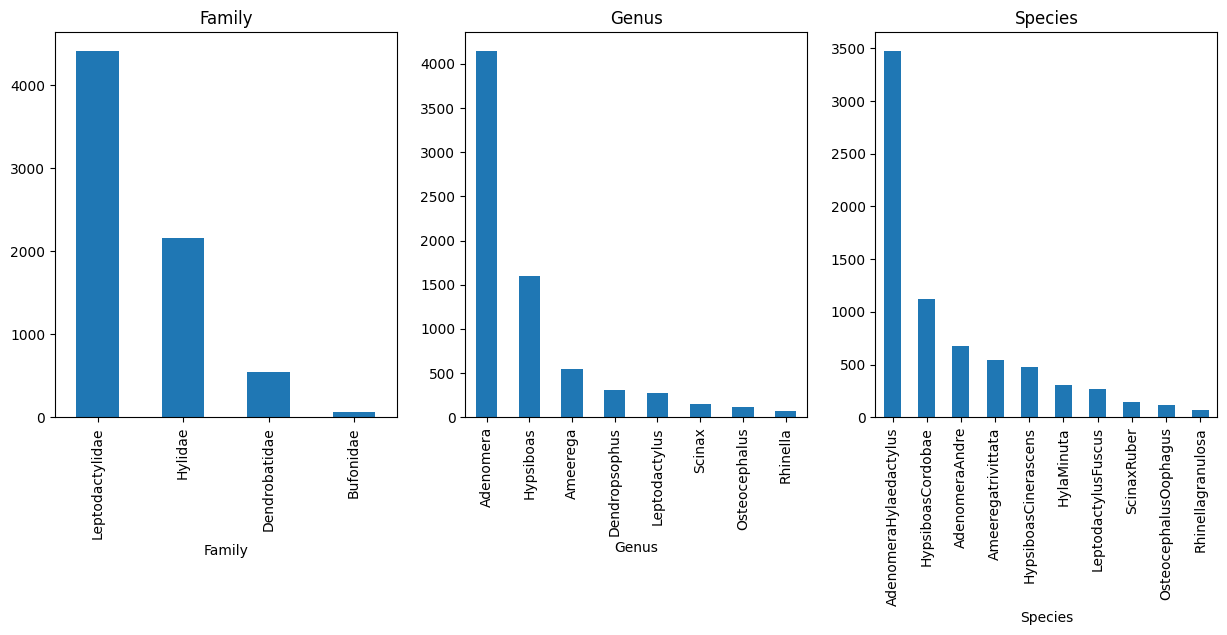

Family
Leptodactylidae    0.614315
Hylidae            0.300903
Dendrobatidae      0.075330
Bufonidae          0.009451
Name: proportion, dtype: float64


Genus
Adenomera        0.576789
Hypsiboas        0.221404
Ameerega         0.075330
Dendropsophus    0.043085
Leptodactylus    0.037526
Scinax           0.020570
Osteocephalus    0.015844
Rhinella         0.009451
Name: proportion, dtype: float64


Species
AdenomeraHylaedactylus    0.483391
HypsiboasCordobae         0.155803
AdenomeraAndre            0.093398
Ameeregatrivittata        0.075330
HypsiboasCinerascens      0.065601
HylaMinuta                0.043085
LeptodactylusFuscus       0.037526
ScinaxRuber               0.020570
OsteocephalusOophagus     0.015844
Rhinellagranulosa         0.009451
Name: proportion, dtype: float64




In [169]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(target_col_names):
    df[col].value_counts().plot(kind='bar', ax=ax[i])
    ax[i].set_title(col)
plt.show()

# print the percentage of each category in the target columns
for col in target_col_names:
    print(df[col].value_counts(normalize=True))
    print('\n')

Conclusions:

1. The dataset is clean and has no missing values.
2. The dataset is imbalanced. Most dominating categories are:
    - Family: Leptodactylidae (0.61)
    - Genus: Adenomera (0.58)
    - Species: AdenomeraHylaedactylus (0.48)
3. The dataset is suitable for classification tasks.

### Statistical Analysis

Performing statistical analysis gives an insight of what trends the data is trying to convey. Some basic analysis includes plotting the frequency distribution curves to understand how the features vary, finding the correlation of the features with each other, etc.


In [170]:
df_updated.describe()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
count,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,...,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000
mean,0.989885,0.323584,0.311224,0.445997,0.127046,0.097939,-0.001397,-0.000370,0.128213,0.055998,...,0.088680,0.007755,-0.049474,-0.053244,0.037313,0.087567,2.520083,1.255733,2.401529,25.220014
std,0.069016,0.218653,0.263527,0.160328,0.162722,0.120412,0.171404,0.116302,0.179008,0.127099,...,0.138055,0.084733,0.082546,0.094181,0.079470,0.123442,0.676037,1.734515,2.179178,13.214399
min,-0.251179,-0.673025,-0.436028,-0.472676,-0.636012,-0.410417,-0.538982,-0.576506,-0.587313,-0.952266,...,-0.421480,-0.759322,-0.680745,-0.361649,-0.430812,-0.379304,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.165945,0.138445,0.336737,0.051717,0.012581,-0.125737,-0.063109,0.004648,-0.001132,...,-0.001764,-0.042122,-0.106079,-0.120971,-0.017620,0.000533,2.000000,0.000000,1.000000,15.000000
50%,1.000000,0.302184,0.274626,0.481463,0.161361,0.072079,-0.052630,0.013265,0.189317,0.063478,...,0.112769,0.011820,-0.052626,-0.055180,0.031274,0.105373,3.000000,0.000000,1.000000,22.000000
75%,1.000000,0.466566,0.430695,0.559861,0.222592,0.175957,0.085580,0.075108,0.265395,0.117725,...,0.201932,0.061889,0.006321,0.001342,0.089619,0.194819,3.000000,3.000000,4.000000,37.000000
max,1.000000,1.000000,1.000000,1.000000,0.752246,0.964240,1.000000,0.551762,0.738033,0.522768,...,0.681157,0.614064,0.574209,0.467831,0.389797,0.432207,3.000000,7.000000,9.000000,60.000000


In [171]:
# # separating the target columns and the feature columns

X_df = df_updated.drop(['Family', 'Genus', 'Species', 'RecordID'], axis=1)
y_df = df_updated[['Family', 'Genus', 'Species']]

print(X_df.shape)

(7195, 22)


Visualizing the distribution of the features


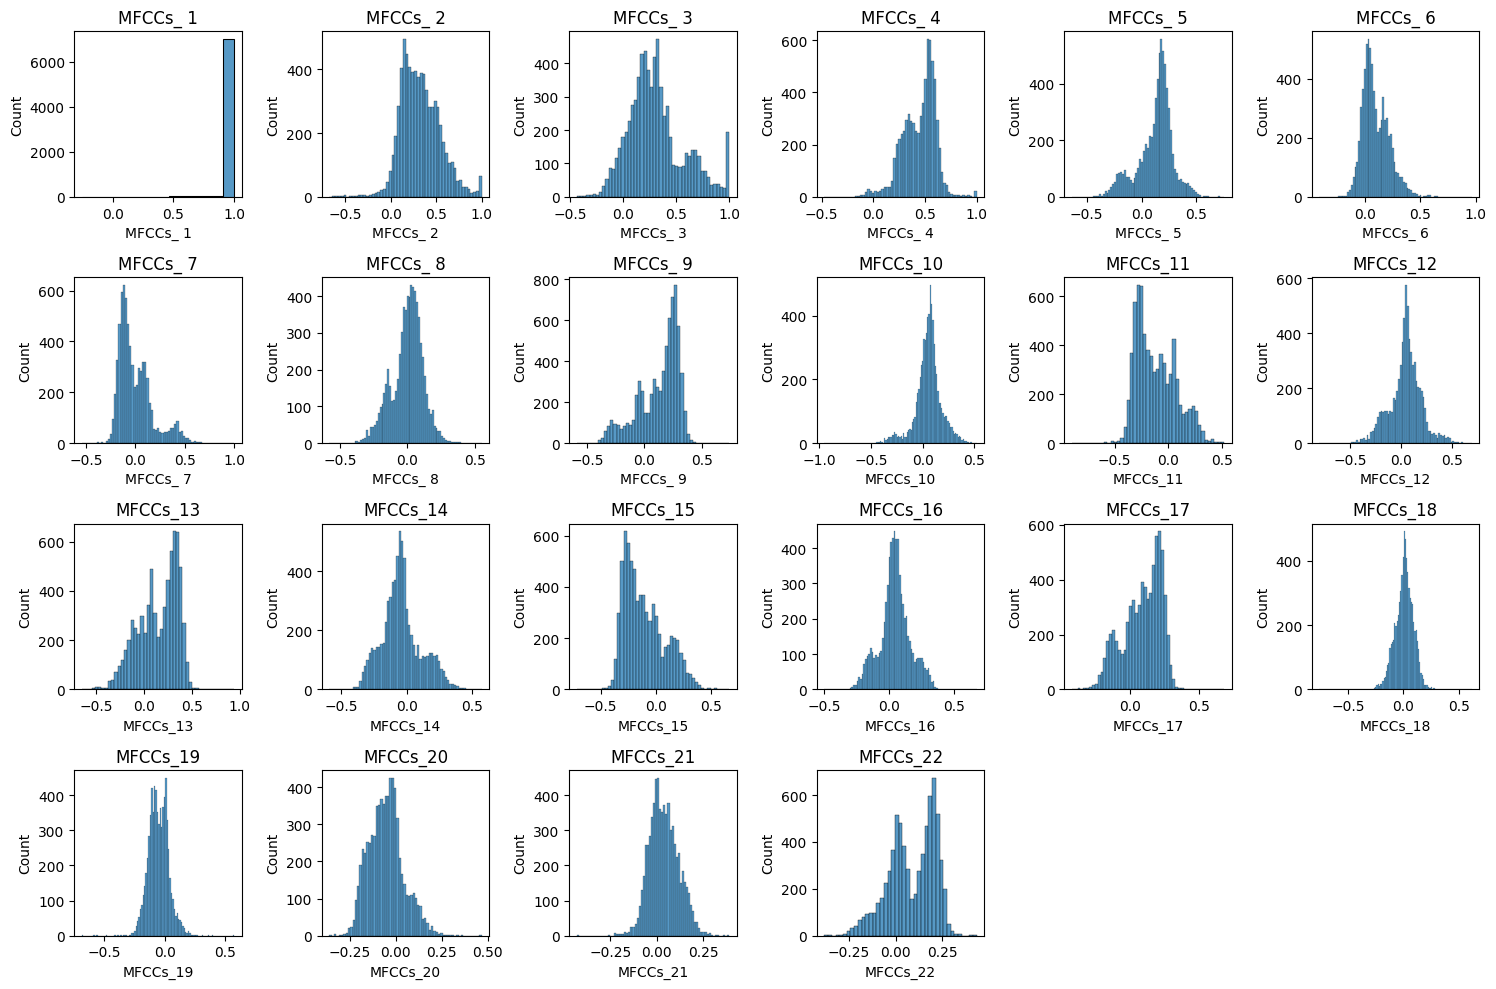

In [172]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(X_df.columns):
    plt.subplot(4, 6, i+1)
    sns.histplot(X_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Handling Outliers

We will find the z-score of each feature and if it is above a threshold, we will remove those points.
Generally the threshold is set to be 3*sigma (3-std)

\**Z-score*: Z-score is a statistical measurement that describes a value's relationship to the mean of a group of values. Z-score is measured in terms of standard deviations from the mean. 

Using z-score calculation on this dataset and setting a threshold of 3 standard deviations for outliers, around 530 data points were removed


(6668, 26)


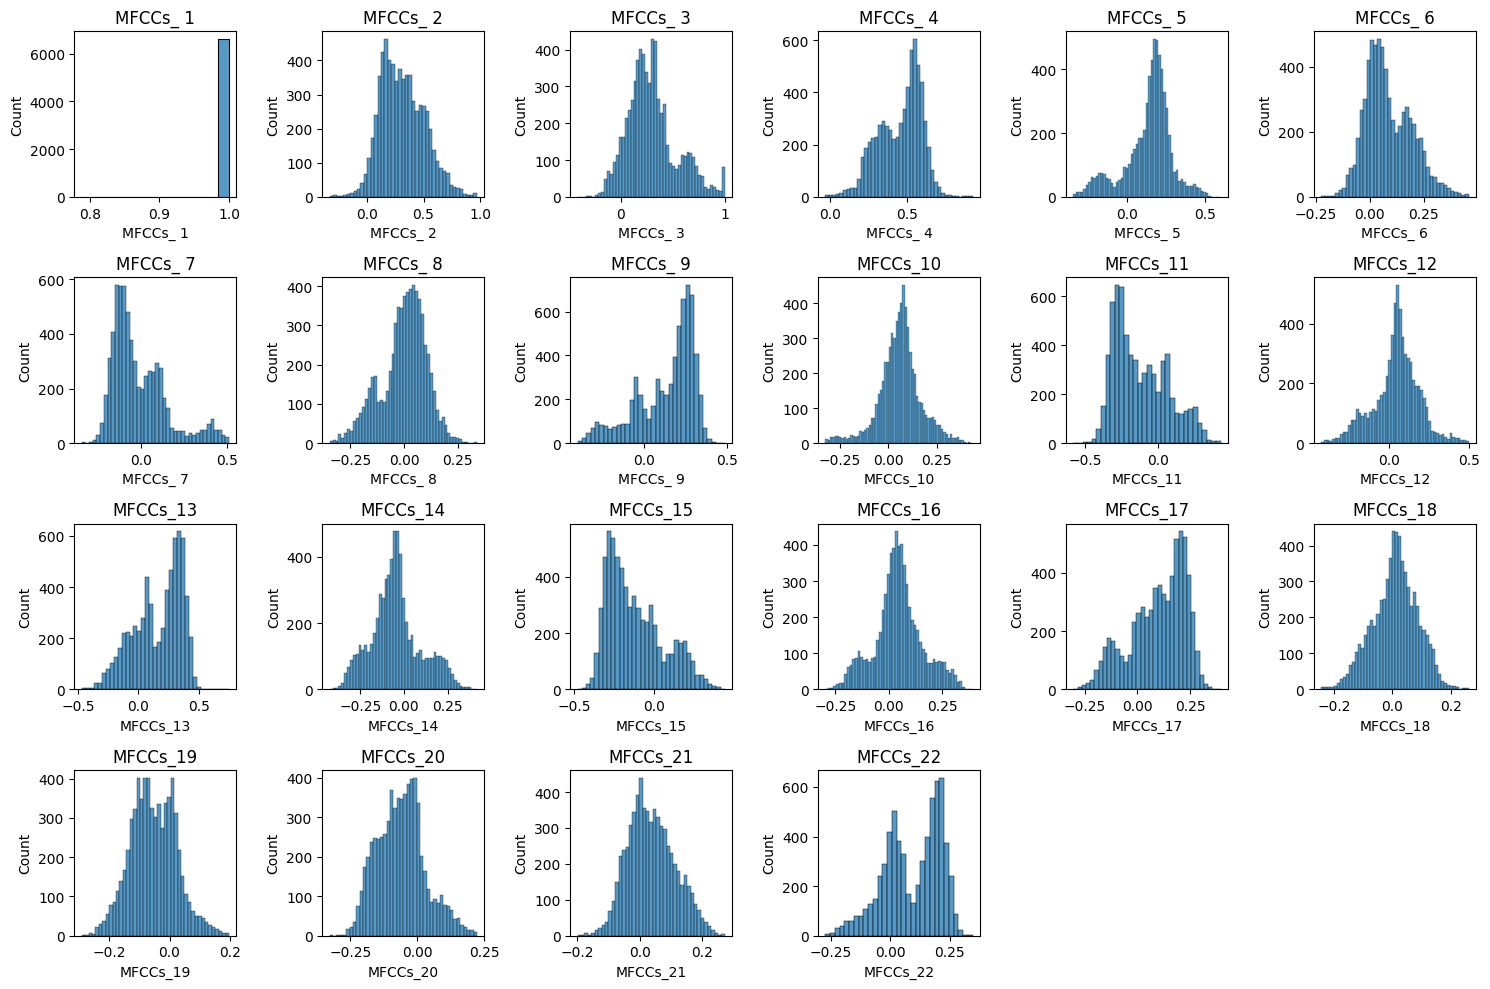

In [173]:
# z-score calculation and outlier removal and count the number of outliers removed in each feature
outliers = dict()
df_cleaned = df_updated.copy()
for col in df.columns:
    if col in target_col_names:
        continue

    z_score = (df[col] - df[col].mean()) / df[col].std()

    df_cleaned = df_cleaned.loc[z_score.abs() <= 3]

print(df_cleaned.shape)

# visualize the distribution of the features after z-score calculation and outlier removal
X_df_cleaned = df_cleaned.drop(['Family', 'Genus', 'Species', 'RecordID'], axis=1).reset_index(drop=True)
plt.figure(figsize=(15, 10))
for i, col in enumerate(X_df_cleaned.columns):
    plt.subplot(4, 6, i+1)
    sns.histplot(X_df_cleaned[col])
    plt.title(col)
plt.tight_layout()
plt.show()

y_df = df_cleaned[['Family', 'Genus', 'Species']].reset_index(drop=True)

### Feature Engineering

We will use Polynomial feature engineering to add more features. It adds NC2 + N more features (N for squaring, and NC2 for interation). Feature Engineering is performed to gain deeper insights of how the features affect the classification outcomes.


In [ ]:
X_poly_features = X_df_cleaned.copy()

from sklearn.preprocessing import PolynomialFeatures

# create a polynomial feature object
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_features = poly.fit_transform(X_poly_features)

X_poly_features.shape

(6668, 275)

### Feature Selection:

We will use the SelectKBest as our selection algorithm

\**SelectKBest*: It is a filter-based feature selection method, which relies on statistical measures to score and rank the features. It uses statistical tests like chi-squared test, ANOVA F-test, or mutual information score. Then, it selects the K features with the highest scores to be included in the final feature subset.

The selection done will be with respect to Family (since SelectKBest takes a 1D parameter as target array)

In [ ]:
# using f_classif to select the best 20 features
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=20)
X_new = selector.fit_transform(X_poly_features, y_df['Family'])

X_new = pd.DataFrame(X_new)

In [ ]:
# Combining X and y dfs to get an updated df
df_processed = pd.concat([X_new, y_df], axis=1)

print(df_processed.shape)

(6668, 3)
(6668, 23)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,Family,Genus,Species
0,-0.108351,-0.009568,0.014038,-0.108351,-0.009568,0.014038,0.027248,-0.021748,-0.001920,0.002818,...,0.018542,-0.002402,0.035590,-0.029512,0.025610,0.024472,-0.021236,3,0,0
1,-0.090974,-0.035303,0.029056,-0.090974,-0.035303,0.029056,0.043839,-0.024420,-0.009476,0.007799,...,0.018895,-0.006035,0.073418,-0.068916,0.044253,0.064690,-0.041539,3,0,0
2,-0.050691,-0.066722,0.077162,-0.050691,-0.066722,0.077162,0.059533,-0.014555,-0.019158,0.022155,...,0.011109,-0.016910,0.070790,-0.063159,0.055165,0.056351,-0.049219,3,0,0
3,-0.136009,-0.130498,0.023954,-0.136009,-0.130498,0.023954,0.033079,-0.044806,-0.042990,0.007891,...,0.013353,-0.002352,0.071438,-0.084750,0.026838,0.100542,-0.031839,3,0,0
4,-0.048885,-0.088550,0.079244,-0.048885,-0.088550,0.079244,0.067273,-0.015006,-0.027182,0.024325,...,0.008442,-0.013685,0.110686,-0.099317,0.072911,0.089117,-0.065422,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,0.004518,-0.001609,0.003001,0.004518,-0.001609,0.003001,0.000551,0.001193,-0.000425,0.000792,...,-0.000106,-0.000070,0.018695,-0.000824,0.000285,0.000036,-0.000013,2,7,9
6664,-0.005648,0.031281,0.014982,-0.005648,0.031281,0.014982,-0.000677,-0.001511,0.008371,0.004010,...,0.000197,-0.000523,0.010543,-0.000925,-0.000260,0.000081,0.000023,2,7,9
6665,-0.027436,0.058854,0.090131,-0.027436,0.058854,0.090131,0.007189,-0.006414,0.013758,0.021070,...,0.001046,-0.003437,0.030503,-0.013799,0.005371,0.006242,-0.002430,2,7,9
6666,-0.008959,0.036489,0.005602,-0.008959,0.036489,0.005602,0.004828,-0.002214,0.009019,0.001385,...,0.000443,-0.000277,0.012990,-0.001370,0.002226,0.000144,-0.000235,2,7,9


### Data Normalization

In [ ]:
# Applying StandardScaler to scale the features. It scales the features to have a mean of 0 and a standard deviation of 1.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# creating a copy of the processed df so that the original df is not affected (in case needed again)
# the same ideolgy is applied ahead, that is, new dfs are created at each step to keep the original df unchanged
df_scaled = df_processed.copy()
df_scaled[X_new.columns] = scaler.fit_transform(df_processed[X_new.columns])

df_scaled.head()

df_scaled.shape


(6668, 23)

### Feature Correlation Analysis

We will find the correlation and see how the chosen 20 features are correlated to each other. If there is a high degree of correlation among the features, one of the correlated pairs may be dropped without a significant loss on classifiable information.

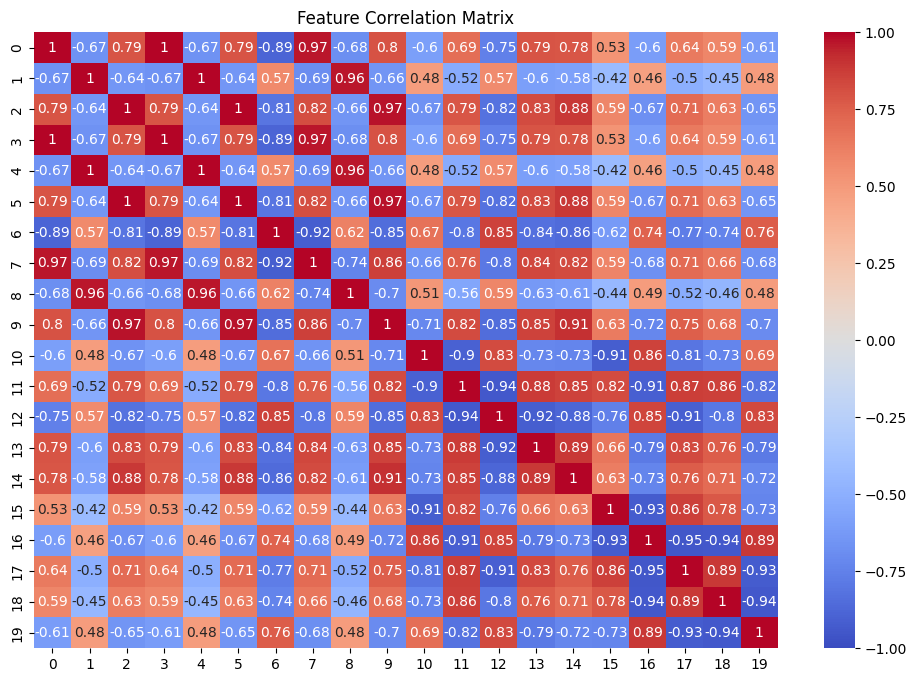

In [182]:
X_df_scaled = df_scaled.drop(['Family', 'Genus', 'Species'], axis=1)

corr_matrix = X_df_scaled.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix")
plt.show()

corr_matrix = corr_matrix.abs()

We see that there are many features that are highly correlated with each other. We can remove these features to reduce the dimensionality of the dataset even further.

In [183]:
# Find the features that are highly correlated

threshold = 0.93

cols_to_drop = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > threshold:
            colname = corr_matrix.columns[i]
            cols_to_drop.append(colname)
            print(f'{colname} is highly correlated with {corr_matrix.index[j]} with a correlation of {corr_matrix.iloc[i, j]}')

print(f'Number of columns to drop: {len(cols_to_drop)}')

# Drop the highly correlated features
X_df_scaled_reduced = X_df_scaled.drop(cols_to_drop, axis=1)
print(X_df_scaled_reduced.shape)

3 is highly correlated with 0 with a correlation of 0.9999641856334468
4 is highly correlated with 1 with a correlation of 0.9999219270119546
5 is highly correlated with 2 with a correlation of 0.9999629516572818
7 is highly correlated with 0 with a correlation of 0.9673886917326129
7 is highly correlated with 3 with a correlation of 0.9674038377774712
8 is highly correlated with 1 with a correlation of 0.9636471256407481
8 is highly correlated with 4 with a correlation of 0.9637666336651168
9 is highly correlated with 2 with a correlation of 0.9745387300448574
9 is highly correlated with 5 with a correlation of 0.9745457882435263
12 is highly correlated with 11 with a correlation of 0.9417068879593508
17 is highly correlated with 16 with a correlation of 0.946224730462931
18 is highly correlated with 16 with a correlation of 0.9428888339024707
19 is highly correlated with 18 with a correlation of 0.9426305929274037
Number of columns to drop: 13
(6668, 10)


# Clustering

## K-Means Clustering

The following methods will be used for the clustering:
- *Elbow-Method* 
- *Silhouette Score Evalutation* 


#### Elbow Method

The Elbow Method helps identify the optimal number of clusters by plotting the WCSS against a range of 𝑘 values:
As 𝑘 increases, WCSS decreases because clusters become smaller and more specific.
The "elbow" point in the plot, where the rate of WCSS reduction slows significantly, suggests the optimal 𝑘. Beyond this point, additional clusters provide diminishing returns in cluster compactness.

$WCSS = \sum_{i=1}^{k} \sum_{j=1}^{n_i} \text{distance}(x_{j}^{(i)}, c_i)^2$

where, $\text{distance}(x_{j}^{(i)}, c_i)^2$ epresents the distance between the j-th data point in cluster i and centroid $c_i$ of that cluster



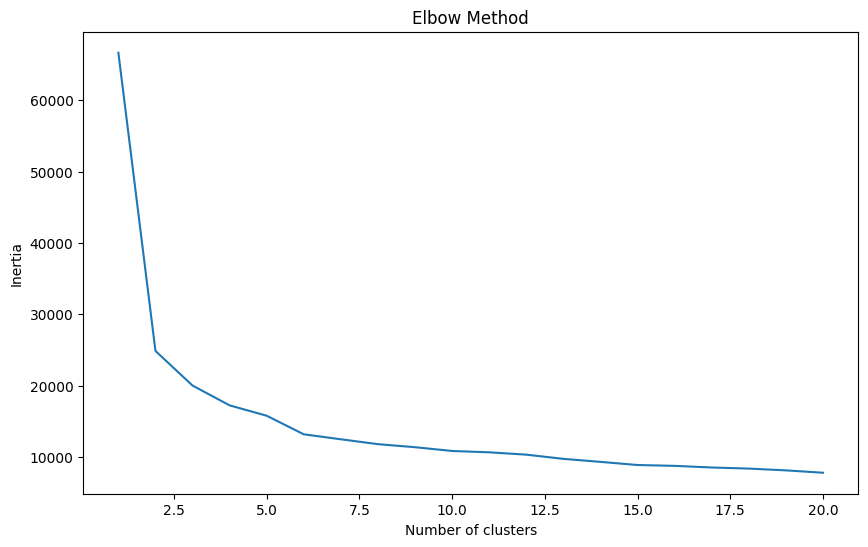

In [184]:
# Elbow Method

from sklearn.cluster import KMeans

inertia = []

for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_df_scaled_reduced)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Silhouette Method

The Silhouette Method evaluates the quality of clusters by measuring how similar each point is to its cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1:

A score close to 1 indicates well-separated and well-defined clusters.
A score close to 0 indicates overlapping clusters.
A score near -1 suggests poor clustering. To find the optimal 𝑘, plot silhouette scores for each 𝑘 and choose the one with the highest average silhouette score. 

Silhouette score for a data point i is given by:

$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$

where:

$a(i)$ is the average distance between $i$ and all other points in the same cluster.

$b(i)$ is the minimum average distance between $i$ and all points in the nearest neighboring cluster.

Overall Silhouette Score S (average over $s(i)$):

$S = \frac{1}{N} \sum_{i=1}^{N} s(i)$

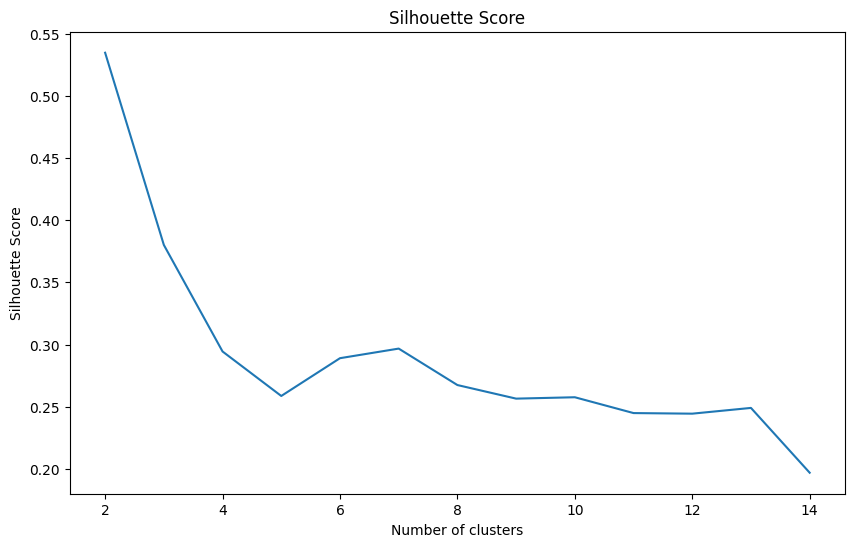

In [185]:
# Silhouette Score Evaluation

from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_df_scaled_reduced)
    silhouette_scores.append(silhouette_score(X_df_scaled_reduced, kmeans.labels_))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()



As we can see, we get an elbow point number of clusters = 5 (since the decrease in inertia is the least after 5, meaning it somewhat stabilizes). Another verification is given the Silhouette score, which obtains a peak at the value 5.

In [186]:
optimal_k = 5

In [187]:
# KMeans Clustering with Random Initialization
kmeans_random = KMeans(n_clusters=optimal_k, init='random', random_state=42)

kmean_random_cluster = kmeans_random.fit_predict(X_df_scaled_reduced)
silhouette_score_random = silhouette_score(X_df_scaled_reduced, kmean_random_cluster)

print(f'Silhouette Score for Random Initialization: {silhouette_score_random}')

# KMeans Clustering with KMeans++ Initialization

kmeans_p_p = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_p_p_cluster = kmeans_p_p.fit_predict(X_df_scaled_reduced)
silhouette_score_p_p = silhouette_score(X_df_scaled_reduced, kmeans_p_p_cluster)

print(f'Silhouette Score for KMeans++ Initialization: {silhouette_score_p_p}')

Silhouette Score for Random Initialization: 0.3235272836252851
Silhouette Score for KMeans++ Initialization: 0.32351702384210534


# Visualizing the Clusters

We will first perform Principal Component Analysis so that we can easily visualize in 2 dimensions.

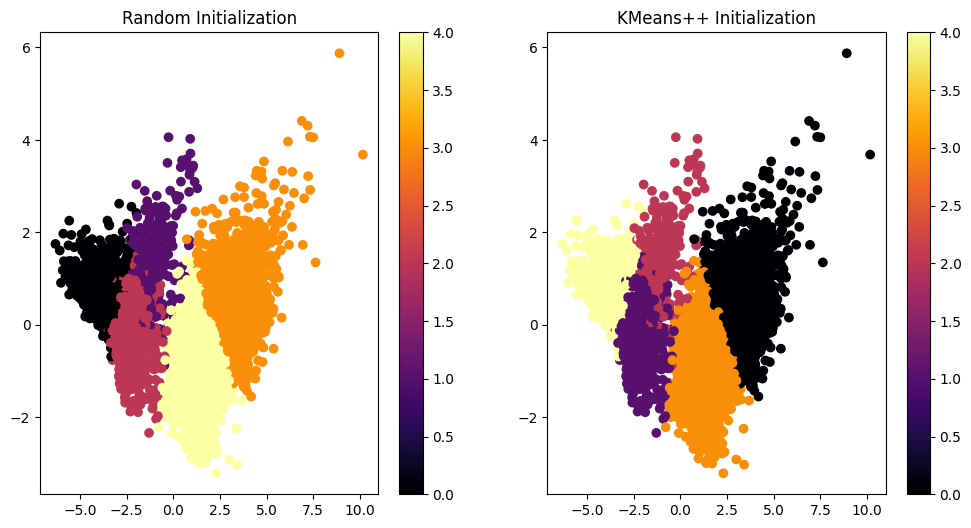

In [188]:
# plot the clusters using 2 principal components for both random and kmeans++ initialization

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_df_scaled_reduced)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Random Initialization')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmean_random_cluster, cmap='inferno')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('KMeans++ Initialization')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_p_p_cluster, cmap='inferno')
plt.colorbar()

plt.show()


### Feature Contribution to Clustering


In [189]:
# for both the random and k-means++ initializations, we will find the contribution of each feature to each cluster
# by calculating the mean of each feature for each cluster

def find_feature_importance(kmeans, X_df_scaled_reduced):
    # getting the cluster centroids
    cluster_centroids = kmeans.cluster_centers_

    # getting the mean of the features
    mean_df = X_df_scaled_reduced.mean().values

    # calculate the difference between the cluster centroids and the mean of the features
    diff = abs(cluster_centroids - mean_df)

    importance = pd.DataFrame({
        'Feature': X_df_scaled_reduced.columns, 
        'Importance': diff.sum(axis=0)
    })

    return importance

In [190]:
importance_random = find_feature_importance(kmeans_random, X_df_scaled_reduced).sort_values(by='Importance', ascending=False)
importance_p_p = find_feature_importance(kmeans_p_p, X_df_scaled_reduced).sort_values(by='Importance', ascending=False)

print(importance_random)
print('\n')
print(importance_p_p)

  Feature  Importance
3       6    4.705478
7      14    4.599716
6      13    4.469150
0       0    4.444948
2       2    4.435786
5      11    3.909611
4      10    3.668418
8      15    3.491727
9      16    3.378080
1       1    3.370167


  Feature  Importance
3       6    4.705138
7      14    4.599745
6      13    4.469353
0       0    4.443328
2       2    4.434767
5      11    3.909075
4      10    3.669961
8      15    3.491295
9      16    3.377837
1       1    3.371406


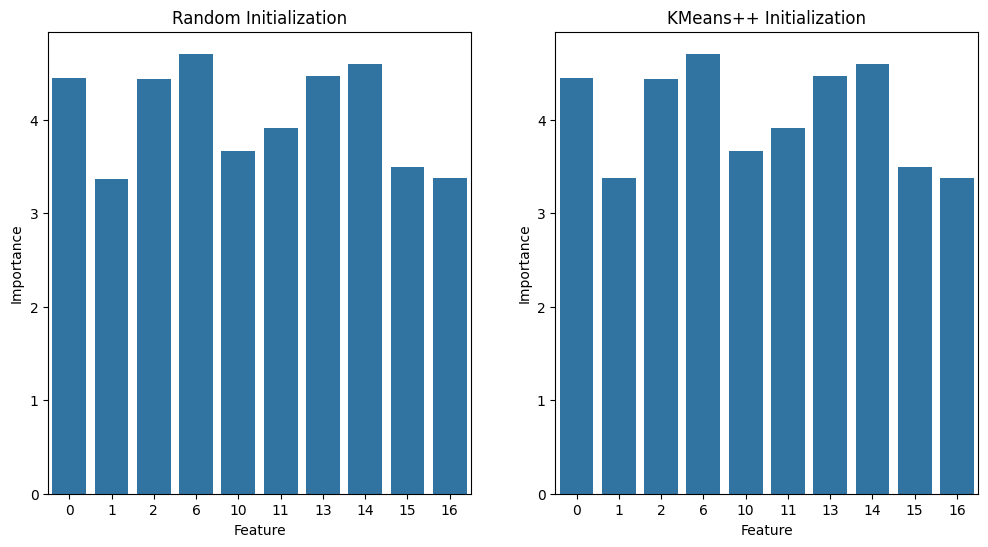

In [191]:
# plot the 10 most important features for each cluster using importance_random and importance_p_p
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Random Initialization')
sns.barplot(x='Feature', y='Importance', data=importance_random.head(10))

plt.subplot(1, 2, 2)
plt.title('KMeans++ Initialization')
sns.barplot(x='Feature', y='Importance', data=importance_p_p.head(10))

plt.show()

# Cluster Quality Evaluation

We will look at the quality of cluster using 2 metrics: Davies-Bouldin Index, and Calinski-Harabasz Index

Using these indices, we will verify that the optimal_k is indeed optimal and hence these indices can be used as a validation for the Elbow and Sihouette Methods

### Davies-Bouldin Index
The DB index measures the average "similarity ratio" between clusters, defined by the ratio of the within-cluster distances to the distance between cluster centroids. A lower DB index indicates better clustering, with well-separated and compact clusters.

### Calinski-Harabasz Index
The CH index, also called the variance ratio criterion, assesses the separation between clusters by comparing the ratio of between-cluster dispersion to within-cluster dispersion. Higher CH values indicate better-defined clusters.

C:\Users\Nived Shah\AppData\Local\Temp\ipykernel_27268\3000991023.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  db_index_kmeans_p_p = db_index.loc[i][0]
C:\Users\Nived Shah\AppData\Local\Temp\ipykernel_27268\3000991023.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ch_index_kmeans_p_p = ch_index.loc[i][0]


,DB Index,CH Index
2,0.700541,11215.638764
3,1.057106,7778.983914
4,1.261517,6443.434061
5,1.165010,5937.206035
6,1.263943,5418.180067
7,1.303879,4869.699442
8,1.371040,4392.323184
9,1.423861,4136.399629
10,1.398088,3836.410114
11,1.356271,3626.295853


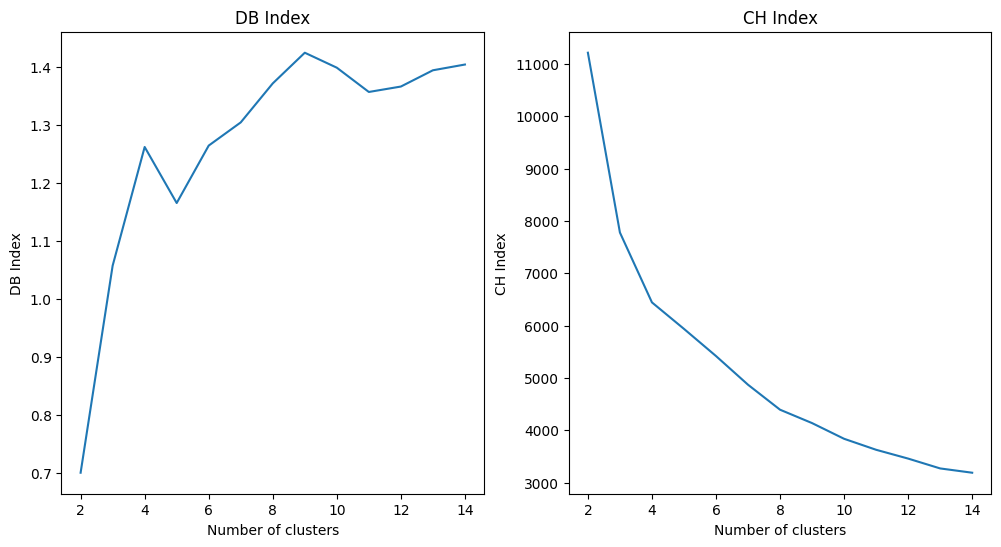

In [192]:
# calculating the DB index and CH index for kmeans++ initialization

from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

db_index_kmeans_p_p = None
ch_index_kmeans_p_p = None

db_index = pd.DataFrame(columns=['DB Index'])
ch_index = pd.DataFrame(columns=['CH Index'])

for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_df_scaled_reduced)

    db_index.loc[i] = davies_bouldin_score(X_df_scaled_reduced, kmeans.labels_)
    ch_index.loc[i] = calinski_harabasz_score(X_df_scaled_reduced, kmeans.labels_)

    if i == optimal_k:
        db_index_kmeans_p_p = db_index.loc[i][0]
        ch_index_kmeans_p_p = ch_index.loc[i][0]

# display the DB index and CH index side by side
display(pd.concat([db_index, ch_index], axis=1))

# print(f'DB Index for KMeans++ Initialization: {db_index_kmeans_p_p}')
# print(f'CH Index for KMeans++ Initialization: {ch_index_kmeans_p_p}')

# line plot of DB index and CH index
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(db_index)
plt.title('DB Index')
plt.xlabel('Number of clusters')
plt.ylabel('DB Index')

plt.subplot(1, 2, 2)
plt.plot(ch_index)
plt.title('CH Index')
plt.xlabel('Number of clusters')
plt.ylabel('CH Index')

plt.show()



Hence, seeing the above index values, we can see that DB score is relatively least for 5, and the CH score is decreases. Thus we can safely assume that the chose k = 5 may not be a very bad choice since compared to other numbers, the index scores tally with Elbow and Silhouette methods.

# Comparative Study

### Agglomerative Hierarchical Clustering

Agglomerative hierarchical clustering is a type of hierarchical clustering that groups data points by following a bottom-up approach. The decision on which clusters to merge depends on the linkage method used. Here we will be using the "Ward" Linkage:

\**Ward's Linkage*: Minimizes the increase in the sum of squared distances within clusters, making it suitable for compact, spherical clusters.

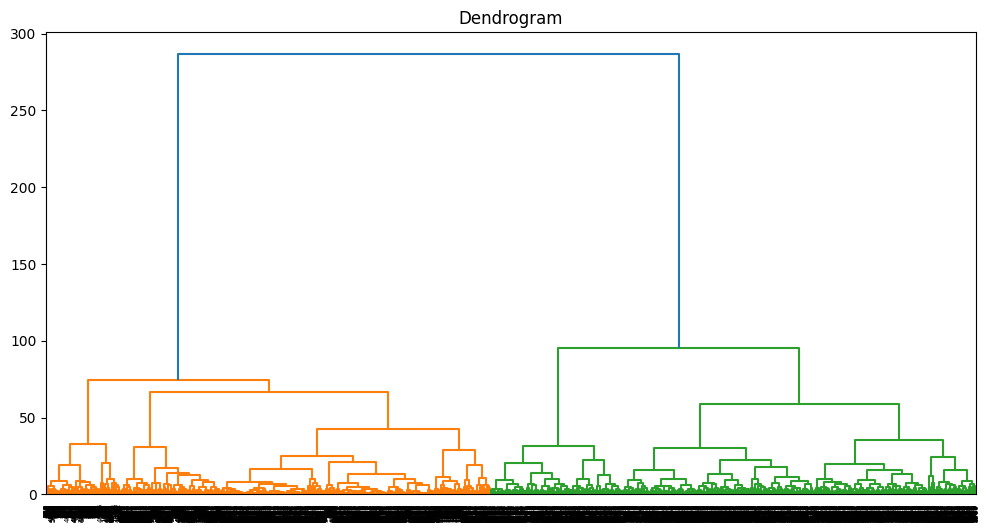

In [197]:
# using agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=optimal_k)
agg_cluster = agg.fit_predict(X_df_scaled_reduced)

# plot the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X_df_scaled_reduced, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.show()


### DBSCAN (Density-Based Spatial Clustering of Applications with Noise) 

DBSCAN is a clustering algorithm that groups points based on density. It works by identifying dense regions as clusters and classifies points in sparse regions as noise or outliers. Key parameters are:

Epsilon $(ε)$: The radius to search for neighboring points.

MinPoints: The minimum number of points required to form a dense region.

When to use: DBSCAN is well-suited for clusters of varying shapes and sizes and handles noise effectively, making it ideal for data with irregular or complex patterns.

In [194]:
# using DBSCAN to group data points based on density
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_df_scaled_reduced)


In [195]:
# compare the clustering results of KMeans, Agglomerative Clustering, and DBSCAN
# using the silhouette score, DB Index, and CH index

silhouette_score_agg = silhouette_score(X_df_scaled_reduced, agg_cluster)
silhouette_score_dbscan = silhouette_score(X_df_scaled_reduced, dbscan_clusters)

db_index_agg = davies_bouldin_score(X_df_scaled_reduced, agg_cluster)
db_index_dbscan = davies_bouldin_score(X_df_scaled_reduced, dbscan_clusters)

ch_index_agg = calinski_harabasz_score(X_df_scaled_reduced, agg_cluster)
ch_index_dbscan = calinski_harabasz_score(X_df_scaled_reduced, dbscan_clusters)

metrics_df = pd.DataFrame({
    'Model': ['KMeans++', 'Agglomerative Clustering', 'DBSCAN'],
    'Silhouette Score': [silhouette_score_p_p, silhouette_score_agg, silhouette_score_dbscan],
    'DB Index': [db_index_kmeans_p_p, db_index_agg, db_index_dbscan],
    'CH Index': [ch_index_kmeans_p_p, ch_index_agg, ch_index_dbscan]
})

display(metrics_df)

,Model,Silhouette Score,DB Index,CH Index
0,KMeans++,0.323517,1.165010,5937.206035
1,Agglomerative Clustering,0.306812,1.187197,5237.500398
2,DBSCAN,-0.325013,1.660175,105.921684


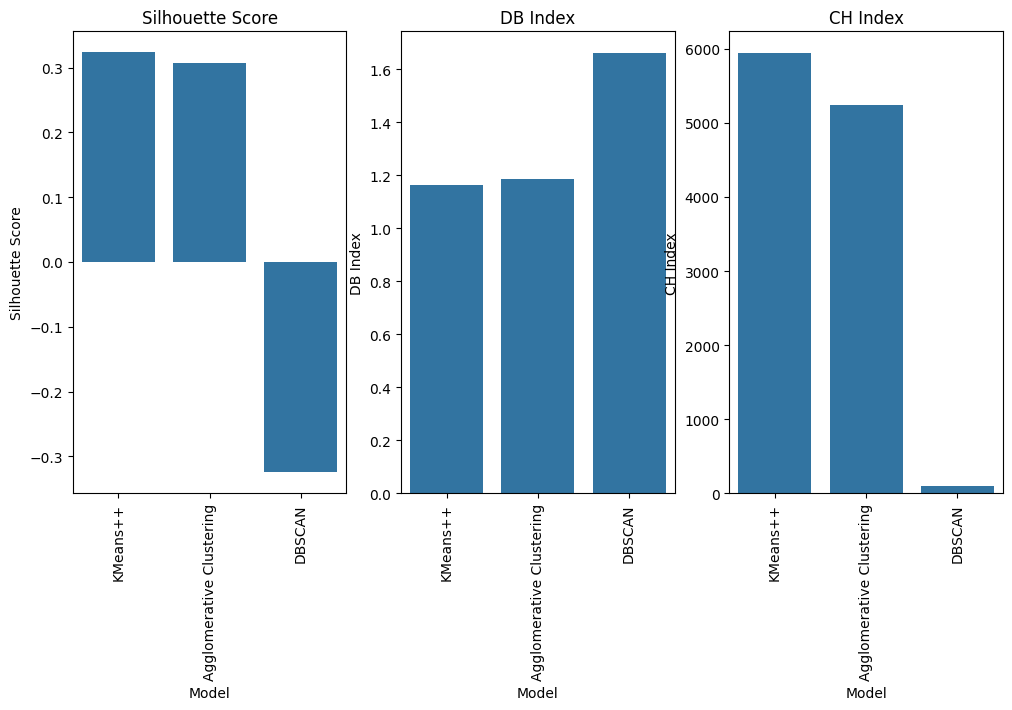

In [203]:
# visualize the metrics_df with x labels vertically written
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='Silhouette Score', data=metrics_df)
plt.xticks(rotation=90)
plt.title('Silhouette Score')

plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='DB Index', data=metrics_df)
plt.xticks(rotation=90)
plt.title('DB Index')

plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='CH Index', data=metrics_df)
plt.xticks(rotation=90)
plt.title('CH Index')

plt.show()


# Conclusion

### Inferences
As discussed before, a negative Silhouette score signifies poor clustering. Thus, we can see that DBSCAN performs poorly, hence it means that it is not able to group the data points, based on density, in a meaningful way. But we can see that Agglomerative and K-Means perform nearly the same (their values are very close for all 3 scores).

### Limitations
K-means: Struggles with non-spherical clusters, sensitive to outliers, and requires pre-specifying the number of clusters (k).

Agglomerative Clustering: Computationally expensive for large datasets, and results can be sensitive to the chosen linkage method.

DBSCAN: Performs poorly with clusters of varying densities, and choosing optimal 𝜖 and MinPoints can be difficult.

### Final Choice
We can conclude from above results that the optimal value of k can be taken to be 5. Another choice of clustering was Agglomerative Clustering, but as discussed, it is sensitive to choice of linkage. For the given dataset, we removed the outliers, hence making K-Means a suitable choice for clustering purpose.

